In [1]:
d = 30
D = 120
r = 3
m_1 = 0
X =10^10
PARA = 100

In [2]:
# Parameters
d = -13
D = -52
r = 2
m_1 = 0
h = 2
X = "10^10"
PARA = 100


In [3]:
PRIME_TABLE_SIZE = 10^8
int_X = sage_eval(X)
K.<a> = NumberField(x^2 - d)
co_loglog = float((2^(r-1) - 1)/2 + m_1)
H = K.class_number()
h = K.narrow_class_group().order()
narrow = 0
if (H != h):
    narrow = 1

In [4]:
import struct
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
@parallel(PARA)
def plot_points_create(prime_table_segment):
    
    plot_points = []
    
    prime_table_name = 'prime_' + str(prime_table_segment)
    prime_table_target_url = "https://s3ds.mdx.jp/prime_tables/" + prime_table_name
    prime_table_obj = urllib.request.urlopen(prime_table_target_url)
    prime_binary = prime_table_obj.read()  
    table_size = len(prime_binary)/8
    
    prime_tmp = 0
    
    for i in range(0,table_size):
        prime = int.from_bytes(prime_binary[8*i:8*i+8], byteorder='big')  

        if prime_table_segment == 0:
             if (prime - prime_tmp)  > (10^(len(str(prime)) - 2)) :
                plot_points.append(prime)
                prime_tmp = prime
        else:
            if (prime - prime_tmp)  > (10^(len(str(prime)) - 3)) :
                plot_points.append(prime)
                prime_tmp = prime
                
        if i == (table_size -1):
            plot_points.append(prime)
    
    return plot_points

In [6]:
plot_points = list(plot_points_create(list(range(0,int_X/PRIME_TABLE_SIZE))))
plot_points.sort()

In [7]:
rp_list = [] 
plot_list_r_p = [[] for i in range(int_X/PRIME_TABLE_SIZE)]

weighted_sum_r_p = 0.0
    
n = 0
    
prime_table_name = 'prime_0'
prime_table_target_url = "https://s3ds.mdx.jp/prime_tables/" + prime_table_name
prime_table_obj = urllib.request.urlopen(prime_table_target_url)
prime_binary = prime_table_obj.read()  
table_size = len(prime_binary)/8
    


for i in range(0,table_size):
    prime = int.from_bytes(prime_binary[8*i:8*i+8], byteorder='big')    
        
    I = K.ideal(prime)
    F = I.factor()
    len_F = len(F)
    ramified = F[0][1]
    norm = F[0][0].absolute_norm()
        
    if (len_F == 1) & (ramified ==1):
        rp_list.append(prime)

prime_table_obj.close()

In [8]:
m = 0
print(len(rp_list), rp_list[0:100])
    
for j in range(0, int_X/PRIME_TABLE_SIZE):
    print(j,m,rp_list[m], len(plot_points[j][1]))
    for k in range(0, len(plot_points[j][1])):
        if rp_list[m]^2 >= plot_points[j][1][k]:
            plot_list_r_p[j].append([plot_points[j][1][k], weighted_sum_r_p])
            if m == (len(plot_points[j][1]) -1):
                break
                
        else:
            while rp_list[m]^2 < plot_points[j][1][k]:
                weighted_sum_r_p = weighted_sum_r_p + float(1/rp_list[m])
                m = m + 1
                if m == (len(plot_points[j][1])):
                    break
            plot_list_r_p[j].append([plot_points[j][1][k], weighted_sum_r_p])

2881512 [3, 5, 23, 37, 41, 43, 73, 79, 89, 97, 103, 107, 109, 127, 131, 137, 139, 149, 179, 191, 193, 197, 199, 211, 229, 241, 251, 263, 281, 283, 293, 311, 317, 347, 349, 353, 367, 397, 401, 409, 419, 421, 439, 443, 449, 457, 461, 467, 491, 503, 509, 523, 541, 547, 557, 563, 571, 577, 593, 599, 607, 613, 617, 647, 659, 661, 709, 719, 727, 733, 751, 761, 769, 773, 821, 823, 853, 859, 877, 883, 887, 907, 911, 919, 929, 941, 971, 977, 991, 1009, 1021, 1031, 1033, 1039, 1061, 1063, 1091, 1097, 1129, 1171]
0 0 3 525
1 608 10007 101
2 824 14143 101
3 988 17321 101
4 1135 20011 101
5 1254 22381 101
6 1362 24527 101
7 1453 26459 101
8 1547 28309 101
9 1620 30047 101
10 1696 31643 11
11 1767 33179 11
12 1836 34667 11
13 1903 36073 11
14 1969 37423 11
15 2031 38767 11
16 2095 40009 11
17 2153 41257 11
18 2213 42437 11
19 2261 43597 11
20 2320 44741 11
21 2376 45833 11
22 2425 46993 11
23 2467 47977 11
24 2520 49019 11
25 2565 50023 11
26 2610 50993 11
27 2652 51971 11
28 2701 52919 11
29 2744 5

In [9]:
@parallel(PARA)
def list_create(prime_table_segment):
    
    global plot_points, narrow
    
    points = plot_points[prime_table_segment][1]
    
    plot_list = []

    weighted_sum = 0.0
    weighted_sum_spl = 0.0
    weighted_sum_pri = 0.0
    weighted_sum_ramified = 0.0

    
    n = 0
    
    prime_table_name = 'prime_' + str(prime_table_segment)
    prime_table_target_url = "https://s3ds.mdx.jp/prime_tables/" + prime_table_name
    prime_table_obj = urllib.request.urlopen(prime_table_target_url)
    prime_binary = prime_table_obj.read()  
    table_size = len(prime_binary)/8
    


    for i in range(0,table_size):
        prime = int.from_bytes(prime_binary[8*i:8*i+8], byteorder='big')    
        
        I = K.ideal(prime)
        F = I.factor()
        len_F = len(F)
        ramified = F[0][1]
        norm = F[0][0].absolute_norm()
        
        if not ((len_F == 1) & (ramified ==1)):
            weighted_sum = weighted_sum + float(len_F*(1/sqrt(norm)))

        if (len_F > 1) & (ramified ==1) :
            weighted_sum_spl = weighted_sum_spl + float(len_F*(1/sqrt(norm)))
            if F[0][0].is_principal():
                if narrow == 0:
                    weighted_sum_pri = weighted_sum_pri + float(len_F*(1/sqrt(norm)))
                else:
                    conj_list = F[0][0].gens_reduced()[0].galois_conjugates(K)
                    if (conj_list[0]*conj_list[1] > 0):
                        weighted_sum_pri = weighted_sum_pri + float(len_F*(1/sqrt(norm)))
        if (len_F == 1) & (ramified > 1) :
            weighted_sum_ramified = weighted_sum_ramified + float(len_F*(1/sqrt(norm)))
            
        if prime == points[n]:
            weighted_sum_r_p = plot_list_r_p[prime_table_segment][n][1]
            plot_list.append([points[n], weighted_sum, weighted_sum_spl, weighted_sum_pri, weighted_sum_r_p,weighted_sum_ramified])
            n = n + 1
    prime_table_obj.close()
    return(plot_list)

In [10]:
plot_list = list(list_create(list(range(0,int_X/PRIME_TABLE_SIZE))))
plot_list.sort()

In [11]:
offset= [0.0,0.0,0.0,0.0,0.0, 0.0]
for l in range(0,int_X/PRIME_TABLE_SIZE):
    for m in range(0, len(plot_list[l][1])):
        for n in [1 ,2, 3, 5]:
            plot_list[l][1][m][n] = plot_list[l][1][m][n] + offset[n]
    for n in [1 ,2, 3, 5]:
        offset[n] = plot_list[l][1][m][n]

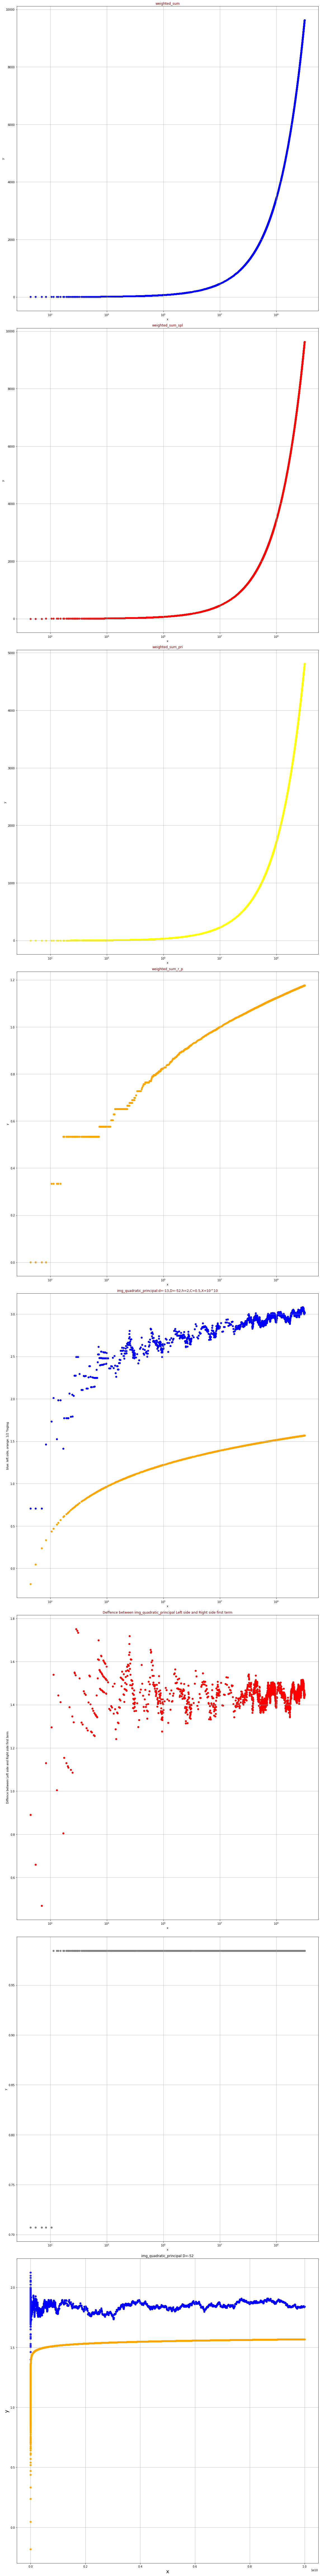

In [12]:
"""
bias against pricipal ideal (img_quadratic_principal)
"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(8, 1, tight_layout=True, figsize=(16, 16*8))

plt.xlabel('X',fontsize=18)
plt.ylabel('Y',fontsize=18)
plt.title('img_quadratic_principal D=' + str(D))

for k in range(8):
    ax[k].set_xscale('log')
    ax[k].grid(which="both") # グリッド表示。"both"はxy軸両
    ax[k].set_xlabel("x")
    ax[k].set_ylabel("y")

ax[7].set_xscale('linear')

ylabel_str = "blue: left side, " + "orange: " + str((2^(r-1) - 1)/2 + m_1) +" *loglog"
ax[4].set_ylabel(ylabel_str)
ax[5].set_ylabel("Diffence between Left side and Right side first term")

ax[0].set_title("weighted_sum", c="darkred", size="large")
ax[1].set_title("weighted_sum_spl", c="darkred", size="large")
ax[2].set_title("weighted_sum_pri", c="darkred", size="large")
ax[3].set_title("weighted_sum_r_p", c="darkred", size="large")
title_str ="img_quadratic_principal:" + "d=" + str(d) + "," + "D=" + str(D) + "," + "h=" + str(H) + "," + "C=" + str(co_loglog) + "," +"X=" + str(X) 
ax[4].set_title(title_str, c="darkred", size="large")
ax[5].set_title("Deffence between img_quadratic_principal Left side and Right side first term", c="darkred", size="large")

for i in range(0,int_X/PRIME_TABLE_SIZE):
    for j in range(0,len(plot_list[i][1])):
        ax[0].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1], color="blue")
        ax[1].scatter(plot_list[i][1][j][0], plot_list[i][1][j][2], color="red")
        ax[2].scatter(plot_list[i][1][j][0], plot_list[i][1][j][3], color="yellow")
        ax[3].scatter(plot_list[i][1][j][0], plot_list[i][1][j][4], color="orange") 
        ax[4].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1]+plot_list[i][1][j][4] - h*plot_list[i][1][j][3] - h*plot_list[i][1][j][4], color="blue") 
        ax[4].scatter(plot_list[i][1][j][0],  co_loglog*float(log(log(plot_list[i][1][j][0]))), color="orange") 
        ax[5].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1]+plot_list[i][1][j][4] - h*plot_list[i][1][j][3] - h*plot_list[i][1][j][4] - co_loglog*float(log(log(plot_list[i][1][j][0]))) , color="red")
        ax[6].scatter(plot_list[i][1][j][0], plot_list[i][1][j][5] , color="gray")

        ax[7].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1] - h*plot_list[i][1][j][3] - h*plot_list[i][1][j][4], color="blue") 
        ax[7].scatter(plot_list[i][1][j][0],  co_loglog*float(log(log(plot_list[i][1][j][0]))), color="orange") 
        
bbox = ax[4].get_tightbbox(fig.canvas.get_renderer())
file_name = "../output/"+title_str +'.png'
fig.savefig(file_name,dpi=fig.dpi,bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))
    
plt.show()  